# Covid-19 & Blood Type

<i>Version 1</i>

## References

* <i><b>"Blood Type May Affect COVID-19 Risk: Study"</b></i> [WebMD](https://www.webmd.com/lung/news/20200320/blood-type-may-affect-covid19-risk-study)
* <i><b>"Relationship between the ABO Blood Group and the COVID-19 Susceptibility"</b></i> by Jiao Zhao, et al. [Abstract & link to PDF](https://www.medrxiv.org/content/10.1101/2020.03.11.20031096v1)
* <i><b>"Blood type distribution by country"</b></i> [Wikipedia](https://en.wikipedia.org/wiki/Blood_type_distribution_by_country)

See https://discourse.pymc.io/t/how-to-improve-a-multinomial-model-from-bda3/2188
and https://towardsdatascience.com/calogica-com-dice-polls-dirichlet-multinomials-eca987e6ec3f

## Module Imports

In [15]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

## Raw Data

<u><b>Excerpt from Zhao, et al:</b></u> <i>"The ABO group in 3694 normal people in Wuhan showed a distribution of 32.16%,
24.90%, 9.10% and 33.84% for A, B, AB and O, respectively, versus the distribution
of 37.75%, 26.42%, 10.03% and 25.80% for A, B, AB and O, respectively, in 1,775
COVID-19 patients from Wuhan Jinyintan Hospital. The proportion of blood group A
and O in COVID-19 patients were significantly higher and lower, respectively, than
    that in normal people (both P < 0.001)."</i>

In [16]:
# From Table 1

# Controls (Wuhan Area), 3694 total:
wuhan_controls = np.array([1188, 920, 336, 1250])

# Wuhan Jinyintan Hospital
# Patients, 1775 total:
wuhan_patients = np.array([670, 469, 178, 458])
# Deaths, 206 total:
wuhan_deaths = np.array([85, 50, 19, 52])

# Renmin Hospital of Wuhan University
# patients, 113 total:
renmin_patients = np.array([45, 25, 15, 28])

# Controls (Shenzhen area), 23386 total:
shenzhen_controls = np.array([6728, 5880, 1712, 9066])

# Patients from Shenzhen Third People's Hospital, 285 total:
shenzhen_patients = np.array([82, 83, 39, 81])

In [17]:
# Wuhan Controls Distribution
print(f"Wuhan Controls Total: {wuhan_controls.sum()}")

wuhan_controls_dist = wuhan_controls / wuhan_controls.sum()
print(f"Wuhan Constrols Dist:\n  [A, B, AB, O] = {wuhan_controls_dist}")

Wuhan Controls Total: 3694
Wuhan Constrols Dist:
  [A, B, AB, O] = [0.3216026  0.24905252 0.09095831 0.33838657]


In [18]:
sick_or_dead = wuhan_patients + wuhan_deaths + renmin_patients + shenzhen_patients
print(sick_or_dead)
print(f"Totoal = {sick_or_dead.sum()}")

[882 627 251 619]
Totoal = 2379


In [21]:
np.ones_like(sick_or_dead)

array([1, 1, 1, 1])

In [22]:
wuhan_controls_dist

array([0.3216026 , 0.24905252, 0.09095831, 0.33838657])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Blood Group]
Sampling 4 chains: 100%|██████████| 24000/24000 [00:05<00:00, 4136.56draws/s]


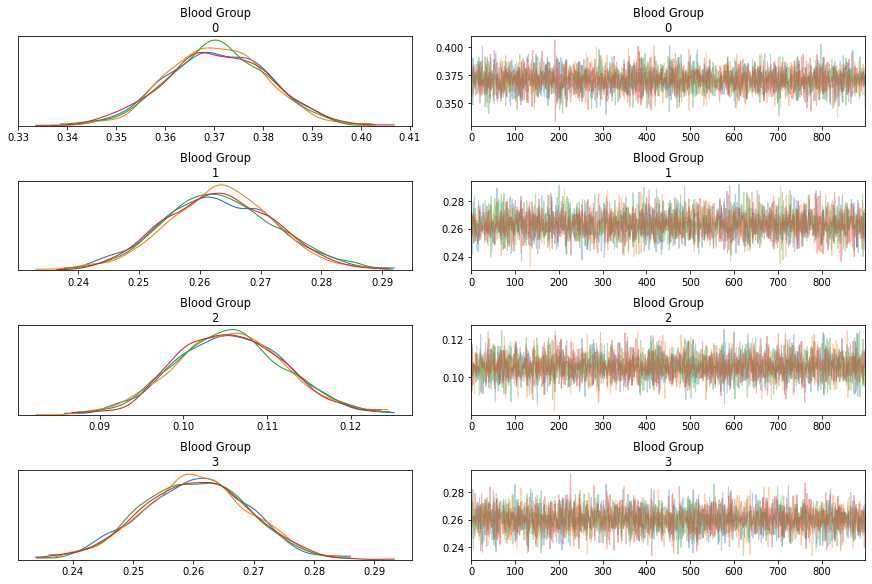

In [27]:
with pm.Model() as mod:
    theta = pm.Dirichlet('Blood Group', a=wuhan_controls_dist)
    post = pm.Multinomial('Posterior', n=sick_or_dead.sum(), p=theta, observed=sick_or_dead)
    trace = pm.sample(1000, tune=5000)
    
    burnin = 100
    chain = trace[burnin:]
    pm.traceplot(chain, lines={'theta':theta})